In [23]:
import pandas as pd
import matplotlib as plt
from soccerplots.radar_chart import Radar

In [24]:
#read chelsea dataset
df = pd.read_csv(r"C:\Users\Jonny\chelseaplayers.csv")
df
#shows first instances


,Player,Positon,Apps,Min,Goals,Assists,sh90,xG,xA,xG90,xA90
0,Mason Mount,M,19,1253,7,5,2.80,5.08,4.18,0.36,0.30
1,Jorginho,M,18,1373,6,1,0.79,5.06,2.09,0.33,0.14
2,Romelu Lukaku,F,14,907,5,0,2.28,4.54,2.22,0.45,0.22
3,Reece James,D,16,1114,4,5,1.70,1.88,3.71,0.15,0.30
4,Ben Chilwell,D,6,540,3,1,2.17,1.30,0.83,0.22,0.14
5,Christian Pulisic,F,12,748,3,0,1.44,3.27,0.42,0.39,0.05
6,N'Golo Kante,M,13,860,2,1,0.84,0.85,1.02,0.09,0.11
7,Antonio Rudiger,D,21,1890,2,0,1.29,1.69,0.65,0.08,0.03
8,Thiago Silva,D,18,1451,2,0,0.62,0.77,0.18,0.05,0.01
9,Kai Havertz,F,15,953,2,1,2.55,3.86,1.21,0.36,0.11


In [25]:
#comparison
df= df[ (df['Player']=='Romelu Lukaku')|(df['Player']=='Kai Havertz')].reset_index()
df

,index,Player,Positon,Apps,Min,Goals,Assists,sh90,xG,xA,xG90,xA90
0,2,Romelu Lukaku,F,14,907,5,0,2.28,4.54,2.22,0.45,0.22
1,9,Kai Havertz,F,15,953,2,1,2.55,3.86,1.21,0.36,0.11


In [26]:
df = df.drop(['index','Positon'],axis=1)
df

,Player,Apps,Min,Goals,Assists,sh90,xG,xA,xG90,xA90
0,Romelu Lukaku,14,907,5,0,2.28,4.54,2.22,0.45,0.22
1,Kai Havertz,15,953,2,1,2.55,3.86,1.21,0.36,0.11


In [27]:
#Use Paramaters
params= list(df.columns)
params=params[1:]
params

['Apps', 'Min', 'Goals', 'Assists', 'sh90', 'xG', 'xA', 'xG90', 'xA90']

In [28]:
#Use lists with ranges for data
ranges = []
a_values = []
b_values = []
for x in params:
    a = min(df[params][x])
    a = a -(a*.25)

    b = max(df[params][x])
    b = b +(b*.25)
    ranges.append((a,b))

for x in range(len(df['Player'])):
    if df['Player'][x]=='Romelu Lukaku':
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x]=='Kai Havertz':
        b_values = df.iloc[x].values.tolist()

a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

In [29]:
#add title
title = dict(
    title_name= 'Romelu Lukaku',
    title_colour='blue',
    subtitle_name = 'Chelsea',
    subtitle_colour = 'blue',
    title_name_2= 'Kai Havertz',
    title_colour_2='yellow',
    subtitle_name_2 = 'Chelsea',
    subtitle_colour_2 = 'yellow',
    title_fontsize = 18,
    subtitle_fontsize =15
)
endnote = 'Jonathan Crawford'

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


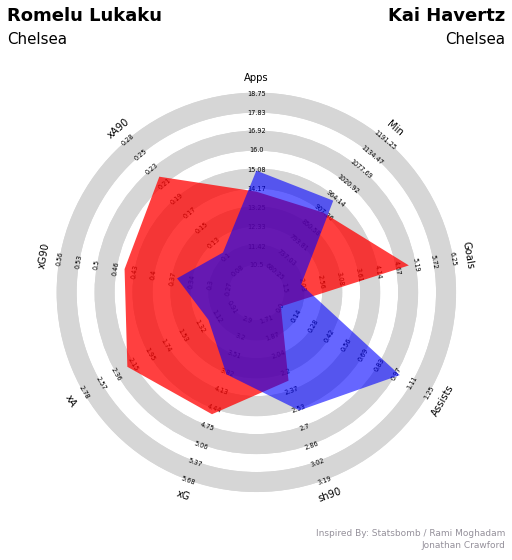

In [30]:
radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                    radar_color=['red','blue'],
                    alphas=[.75,.6],title=title,endnote=endnote,
                    compare=True)